In [15]:
from econometron.Models.Neuralnets import n_beats
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
GDP=pd.read_csv("../Data_Fred/gdp.csv", index_col=0, parse_dates=True)/1000

<Axes: xlabel='observation_date'>

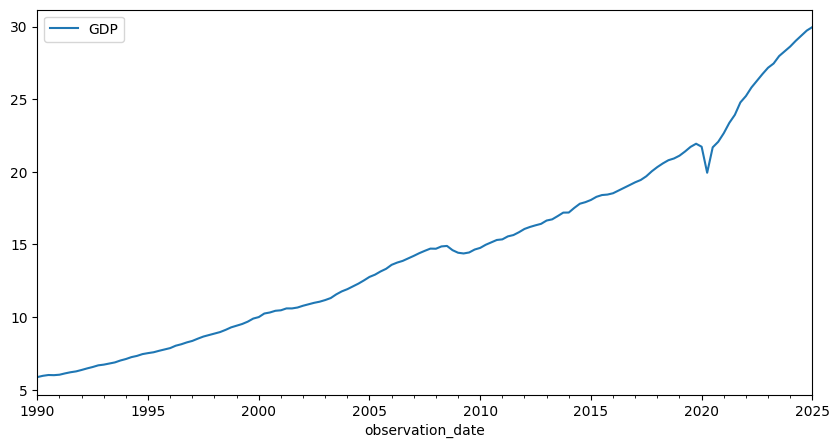

In [39]:
GDP.plot(figsize=(10, 5))

In [40]:
backcast_length = 10   # Use 20 Q's of history
forecast_length = 5     # Predict next 5 Q's

# Create stack configurations
stack_configs = [
    {
        'n_blocks': 4,
        'basis_type': 'polynomial',
        'n_layers_per_block': 6,
        'hidden_size': 512,
        'degree': 2,
        'share_weights': True
    },
    {
        'n_blocks': 4,
        'basis_type': 'fourier',
        'n_layers_per_block': 6,
        'hidden_size': 512,
        'share_weights': True
    },
    {
        'n_blocks': 4,
        'basis_type': 'generic',
        'n_layers_per_block': 6,
        'hidden_size': 512,
        'share_weights': True
    }
]

In [41]:
model = n_beats.NeuralForecast(
    stack_configs=stack_configs,
    backcast_length=backcast_length,
    forecast_length=forecast_length
)
print(f"Model created with {sum(p.numel() for p in model.model.parameters()):,} parameters")

NeuralForecast initialized on cpu
Model parameters: 3,972,656
Model created with 3,972,656 parameters


In [42]:
o=GDP.values

In [43]:
train_data, val_data, test_data = model.process_data(data=o,train_ratio=0.8,val_ratio=0.15,normalize=False)

Data processed - Train: 101, Val: 19, Test: 7


In [44]:
train_data.shape

torch.Size([101, 15])

In [45]:
train_data.ndim

2

In [46]:
history = model.fit(
    train_data=train_data,
    val_data=val_data,
    epochs=160,
    batch_size=64,
    learning_rate=1e-4,
    optimizer='adam',
    loss_function='mae',
    early_stopping=True,
    patience=15,
    scheduler='plateau',
    gradient_clip=1.0,
    verbose=True
)

Starting training...
Input shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
stack_forecast shape: torch.Size([64, 5])
residual shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
stack_forecast shape: torch.Size([64, 5])
residual shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
Input shape: torch.Size([64, 10])
stack_forecast shape: torch.Size([64, 5])
residual shape: torch.Size([64, 10])
Input shape: torch.Size([37, 10])
Input shape: torch.Size([37, 10])
Input shape: torch.Size([37, 10])
Input shape: torch.Size([37, 10])
stack_forecast shape: torch.Size([37, 5])
residual shape: torch.Size([37, 10])
Input shape: torch.Size([37, 10])
Input shape: torch.Size([37, 10])
Input shape: torch.Size([37, 10])
Input shape: torc

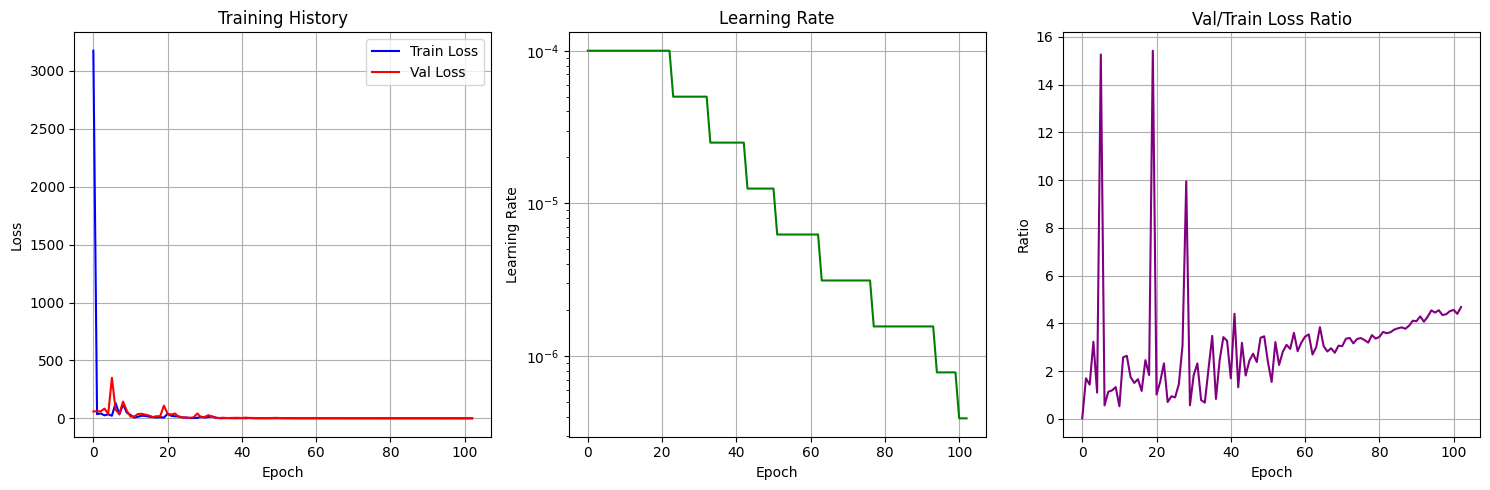

In [47]:
model.plot_training_history()

In [48]:
test_metrics = model.evaluate(
    test_data=test_data,
    metrics=['mae', 'mse', 'rmse', 'mape']
)

Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size([1, 5])
residual shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size([1, 5])
residual shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size([1, 5])
residual shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size([1, 5])
residual shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size

In [49]:
GDP.mean()

GDP    14.681495
dtype: float64

In [50]:
recent_data = GDP.values
input_sequence = recent_data[-backcast_length:]
forecast, components = model.forecast(
    input_sequence=input_sequence,
    return_components=True
)
print(f"Forecast for next {forecast_length} Quarter:")
for i, pred in enumerate(forecast.flatten()):
    print(f"Quarters {i+1}: {pred:.2f}")

TypeError: 'int' object is not callable

In [ ]:
import scipy.io

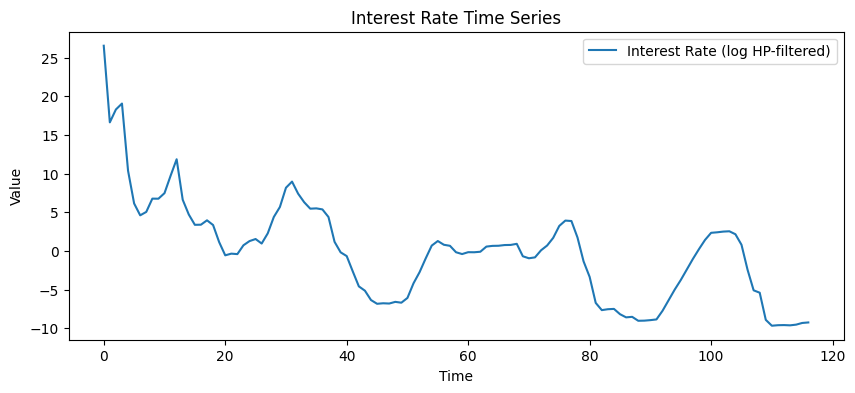

In [ ]:
# Load the interest rate
data = scipy.io.loadmat('../../Z.mat')["Z"][0, :]*1000

# Plot the raw data
plt.figure(figsize=(10, 4))
plt.plot(data, label="Interest Rate (log HP-filtered)")
plt.title("Interest Rate Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [ ]:
type(data)

numpy.ndarray

In [ ]:
train_data, val_data, test_data = model.process_data(
    data=data,
    train_ratio=0.8,
    val_ratio=0.15,
    normalize=False
)

Data processed - Train: 74, Val: 13, Test: 6


In [ ]:
train_data.shape

torch.Size([74, 25])

In [ ]:
history = model.fit(
    train_data=train_data,
    val_data=val_data,
    epochs=100,
    batch_size=32,
    learning_rate=1e-3,
    optimizer='adam',
    loss_function='mae',
    early_stopping=True,
    patience=15,
    scheduler='plateau',
    gradient_clip=1.0,
    verbose=True
)

Starting training...
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
stack_forecast shape: torch.Size([32, 5])
residual shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
stack_forecast shape: torch.Size([32, 5])
residual shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
stack_forecast shape: torch.Size([32, 5])
residual shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
stack_forecast shape: torch.Size([32, 5])
residual shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
stack_forecast shape: torch.Size([32, 5])
residual shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
Input shape: torch.Size([32, 20])
stack_forecast shape: torch.Size([32, 5]